# Global Temperature

In [1]:
import json
import matplotlib.pyplot as plt
import numpy
import pandas
from pandas.io.json import json_normalize
import seaborn

In [2]:
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
seaborn.set(font_scale=2.5)
seaborn.set_style("whitegrid")

In [4]:
json_path = '/Users/aaronjones/Documents/github/data-exploration/global_temperature/global-temperature-time-series.json'

In [5]:
with open(json_path) as f:
    
    json_data = json.load(f)

In [6]:
temp = json_normalize(json_data)
temp = (
    temp[["fields.date", "fields.source", "fields.mean"]]
    .sort_values("fields.date")
    .pivot(
        index="fields.date", 
        columns="fields.source", 
        values="fields.mean"
    )
    .reset_index()
    .rename(columns={
        "fields.date": "Date", 
        "GCAG": "MeanTempGCAG", 
        "GISTEMP": "MeanTempGIS"
    })
)

temp.columns.name = None
temp["Date"] = pandas.to_datetime(temp["Date"])

temp = temp[["Date", "MeanTempGIS"]]

temp["MA12Month"] = temp["MeanTempGIS"].rolling(13).mean()

temp.dropna(inplace=True)

temp.head(10)

,Date,MeanTempGIS,MA12Month
12,1881-01-01,-0.10,-0.196154
13,1881-02-01,-0.14,-0.183846
14,1881-03-01,0.01,-0.166923
15,1881-04-01,-0.03,-0.155385
16,1881-05-01,-0.04,-0.137692
17,1881-06-01,-0.28,-0.148462
18,1881-07-01,-0.07,-0.131538
19,1881-08-01,-0.03,-0.115385
20,1881-09-01,-0.09,-0.116154
21,1881-10-01,-0.20,-0.118462


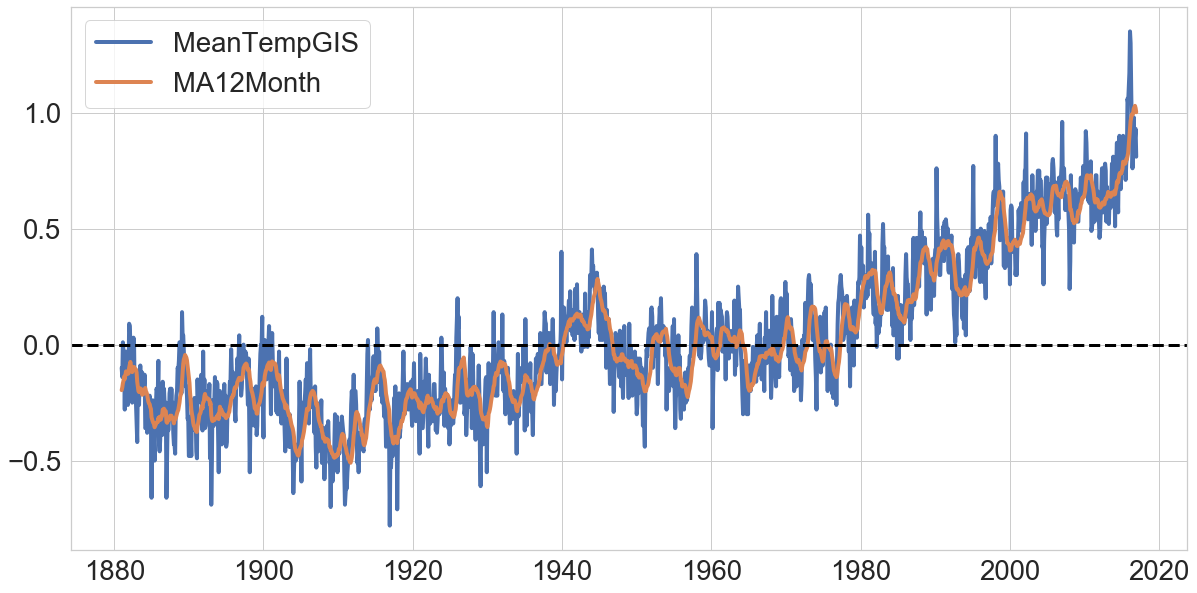

In [9]:
plt.plot(temp.Date.values, temp.MeanTempGIS.values, linewidth = 4, label="MeanTempGIS")
plt.plot(temp.Date.values, temp.MA12Month.values, linewidth = 4, label="MA12Month")
plt.axhline(y=0, linestyle='dashed', linewidth=3, color='black')
plt.legend()
plt.show(block=True)

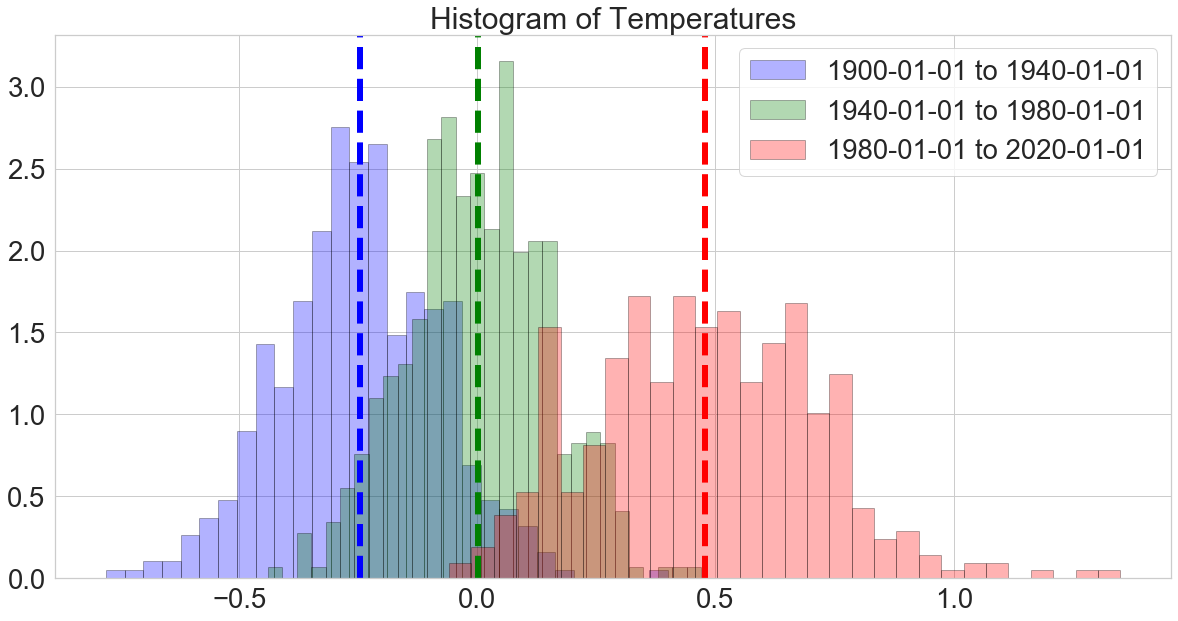

In [8]:
dates = [
    ('1900-01-01', '1940-01-01', 'blue')
    , ('1940-01-01', '1980-01-01', 'green')
    , ('1980-01-01', '2020-01-01', 'red')
]

for dts in dates:
    
    d0 = dts[0]
    d1 = dts[1]
    c = dts[2]
    vals = temp.loc[(temp['Date'] >= d0) & (temp['Date'] < d1), 'MeanTempGIS'].values
    
    plt.hist(vals, density=True, bins=30, color=c, edgecolor='black', alpha=0.3, label=(d0 + ' to ' + d1))
    plt.axvline(numpy.mean(vals), color=c, linestyle='dashed', linewidth=6)

plt.title('Histogram of Temperatures')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show(block=True)